In [86]:
from mvlearn.embed.kcca_experimental import KCCA
from mvlearn.embed.dcca import DCCA
from mvlearn.embed.gcca import GCCA
from mvlearn.datasets.GaussianMixture import GaussianMixture
from mvlearn.utils.plotting import plot_2views

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from graspy.plot import pairplot
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data 1

In [32]:
def make_data(kernel, N, seeds=[None]*4):
    ## Define two latent variables (number of samples x 1)
    np.random.seed(seeds[0])
    latvar1 = np.random.randn(N,)
    np.random.seed(seeds[1])
    latvar2 = np.random.randn(N,)
    
    ## Define independent components for each dataset (number of observations x dataset dimensions)
    np.random.seed(seeds[2])
    indep1 = np.random.randn(N, 4)
    np.random.seed(seeds[3])
    indep2 = np.random.randn(N, 5)
    #indep2 = np.random.randn(N, 4)
    
    if kernel == "linear":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
        y = 0.25*indep2 - 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        #x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        #y = 0.25*indep2 + -0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        
        return [x,y]
    
    elif kernel == "poly":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        #x = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        #y = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, 0*latvar1**2, 0*latvar2**2)).T
        
        return [x,y]
    
    elif kernel == "gaussian":
        np.random.seed(seeds[0])
        t = np.random.uniform(-np.pi, np.pi, N)
        np.random.seed(seeds[1])
        e1 = np.random.normal(0, 0.05, (N,2))
        np.random.seed(seeds[2])
        e2 = np.random.normal(0, 0.05, (N,2))
        
        x = np.zeros((N,2))
        x[:,0] = t
        x[:,1] = np.sin(3*t)
        x += e1
        
        y = np.zeros((N,2))
        y[:,0] = np.exp(t/4)*np.cos(2*t)
        y[:,1] = np.exp(t/4)*np.sin(2*t)
        y += e2
        
        return [x,y]

### Linear KCCA

In [170]:
ktype = 'linear'
n=100
Xs_train = make_data(ktype, n)
Xs_test = make_data(ktype, n)

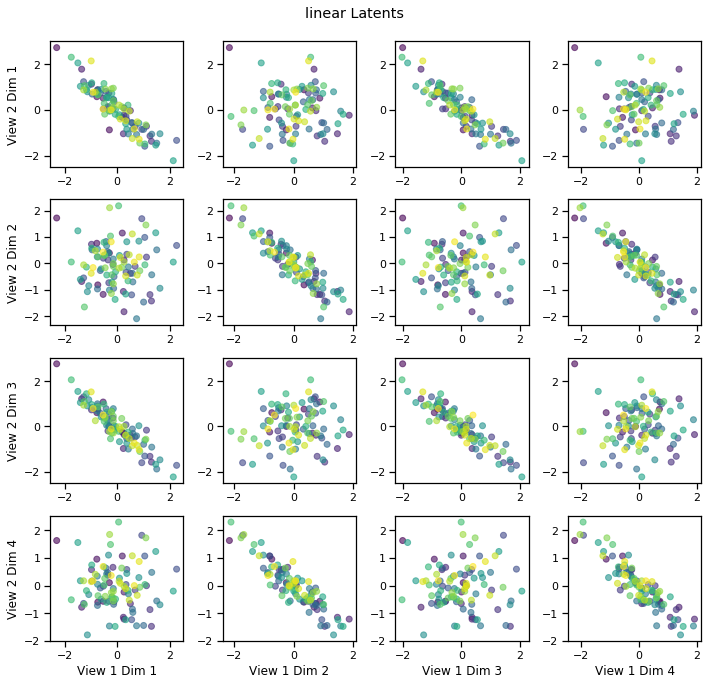

In [171]:
plot_2views(Xs_train, np.arange(n), title=f'{ktype} Latents', scatter_kwargs={'alpha':0.6})

In [172]:
kcca = KCCA(ktype=ktype, reg = 1.0, n_components = 4, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

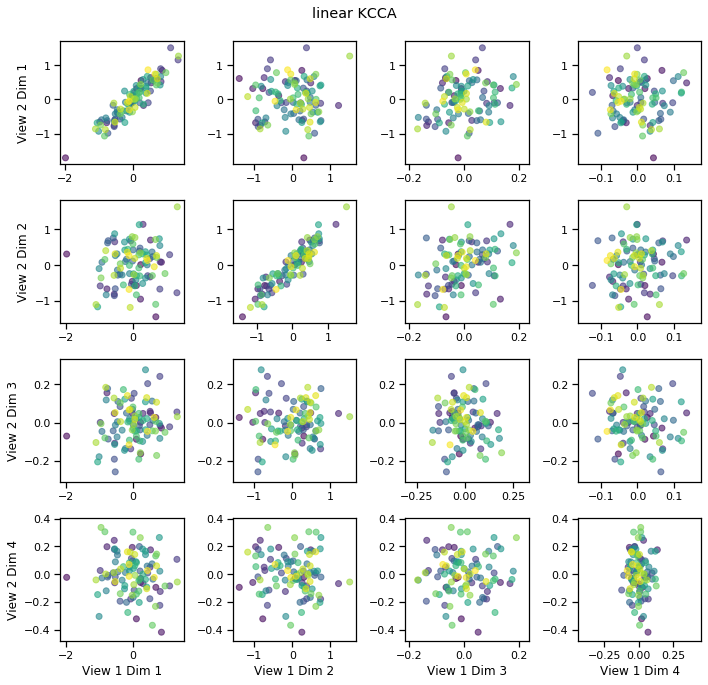

In [173]:
plot_2views(components, np.arange(n), title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'alpha':0.6})

### Polynomial KCCA

In [182]:
ktype = 'poly'
n=100
Xs_train = make_data(ktype, n)
Xs_test = make_data(ktype, n)

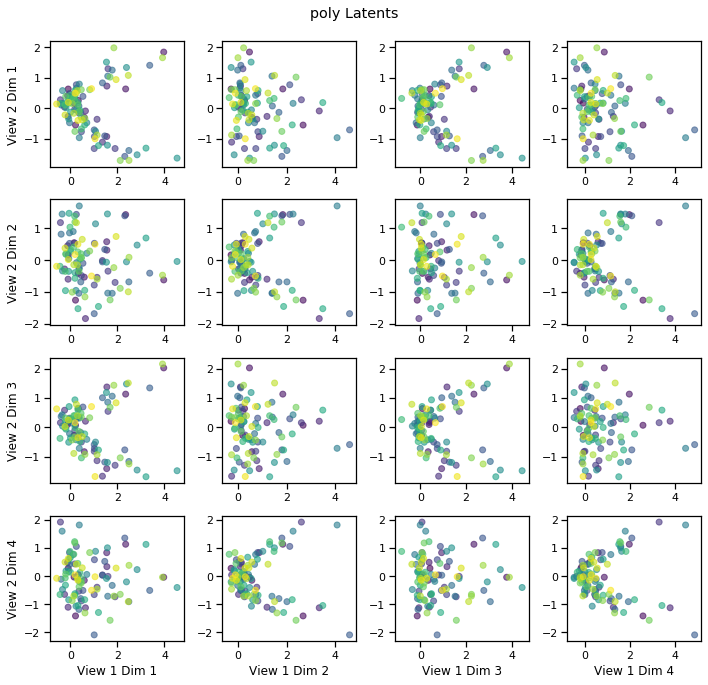

In [183]:
plot_2views(Xs_train, np.arange(n), title=f'{ktype} Latents', scatter_kwargs={'alpha':0.6})

In [194]:
kcca = KCCA(ktype=ktype, reg = 0.1, constant=0.1, n_components = 4, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

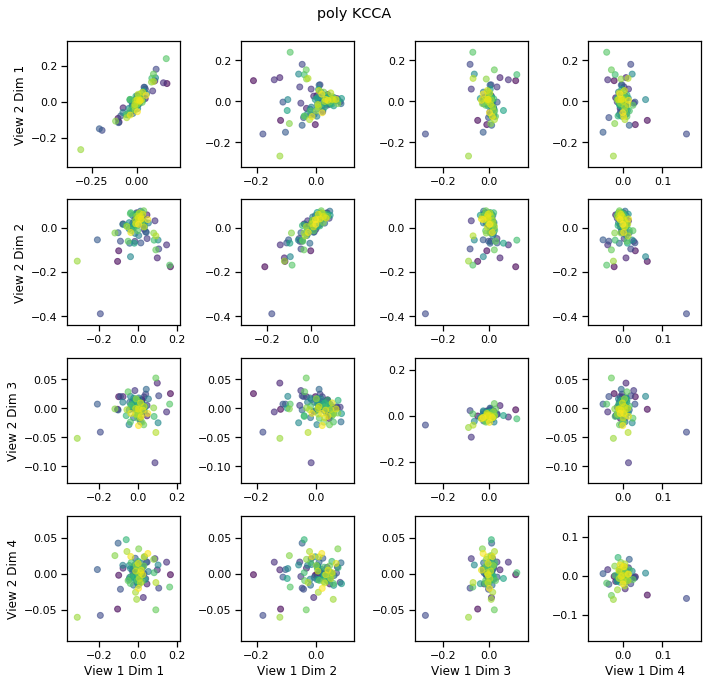

In [195]:
plot_2views(components, np.arange(n), title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'alpha':0.6})

### Gaussian KCCA

In [196]:
ktype = 'gaussian'
n=100
Xs_train = make_data(ktype, n)
Xs_test = make_data(ktype, n)

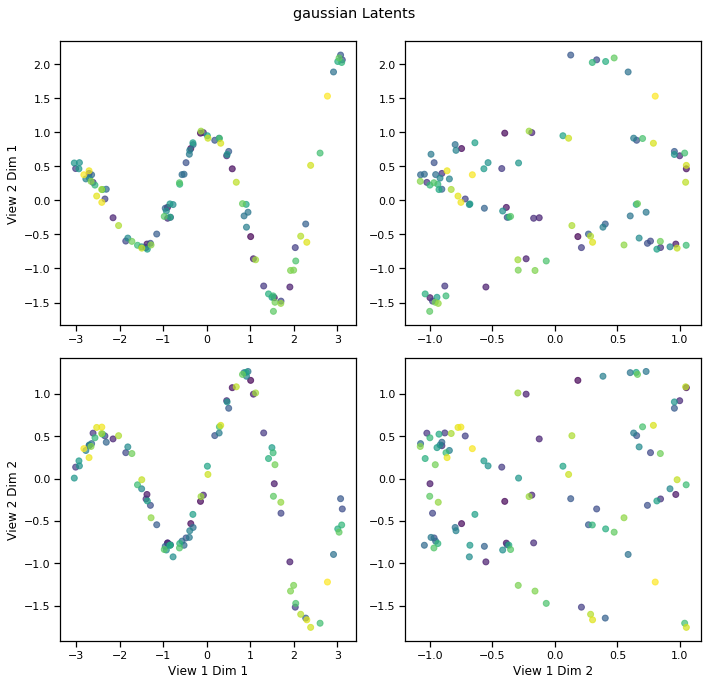

In [197]:
plot_2views(Xs_train, np.arange(n), title=f'{ktype} Latents', scatter_kwargs={'alpha':0.7})

In [180]:
kcca = KCCA(ktype=ktype, reg = 0.01, n_components = 2, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

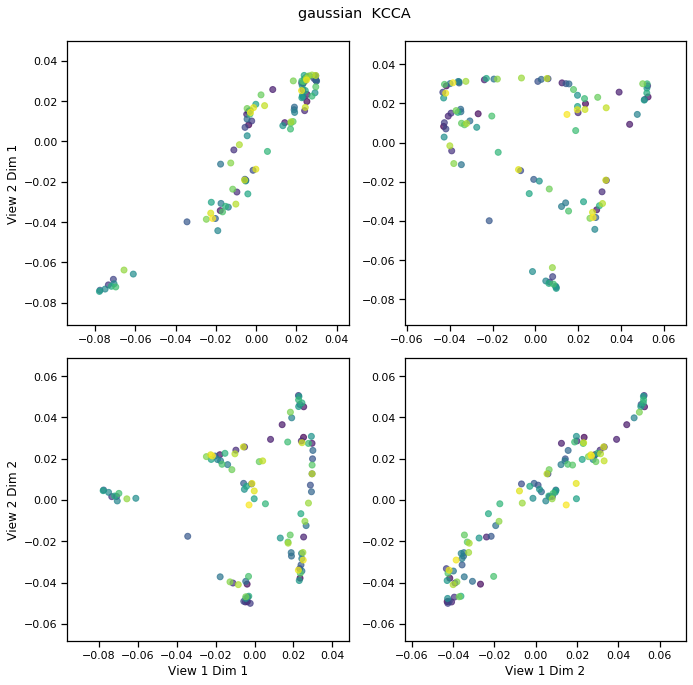

In [181]:
plot_2views(components, np.arange(n), title=f'{ktype}  KCCA', equal_axes=True, scatter_kwargs={'alpha':0.7})

## Data 2

In [198]:
## Training
n = 100
mu = [[0,1], [0,-1]]
sigma = 2*[np.eye(2), np.eye(2)]
pi = [0.5,0.5]
GM_train = GaussianMixture(n,mu,sigma,class_probs=pi)

## Test
GM_test = GaussianMixture(n,mu,sigma,class_probs=pi)

### Linear KCCA

In [199]:
transform = 'linear'
n_noise = 2
GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train,y_train = GM_train.get_Xy()
Xs_test,y_test = GM_test.get_Xy()

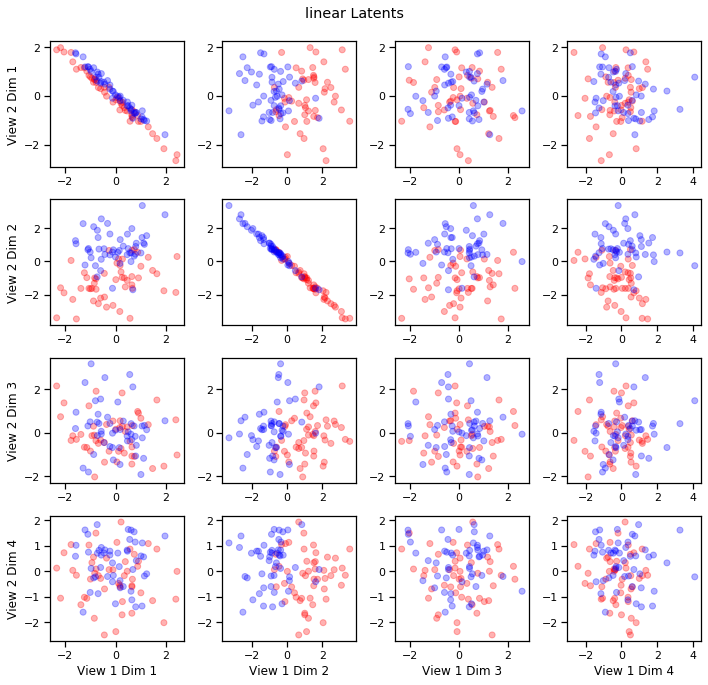

In [200]:
plot_2views(Xs_train, y_train, title=f'{transform} Latents', scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

In [201]:
ktype='linear'
kcca = KCCA(ktype=ktype, reg = 1.0, n_components = 4, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

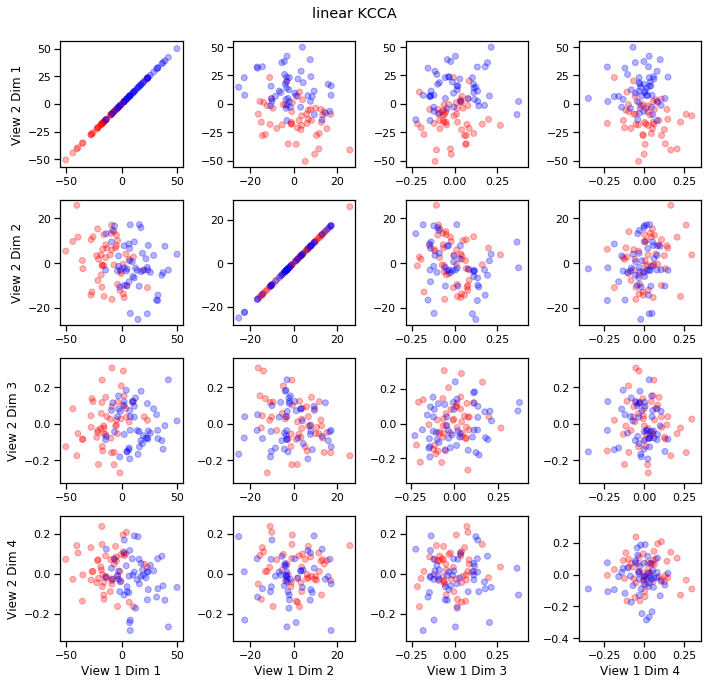

In [202]:
plot_2views(components, y_test, title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

### Polynomial

In [258]:
transform = 'poly'
n_noise = 2
GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train,y_train = GM_train.get_Xy()
Xs_test,y_test = GM_test.get_Xy()

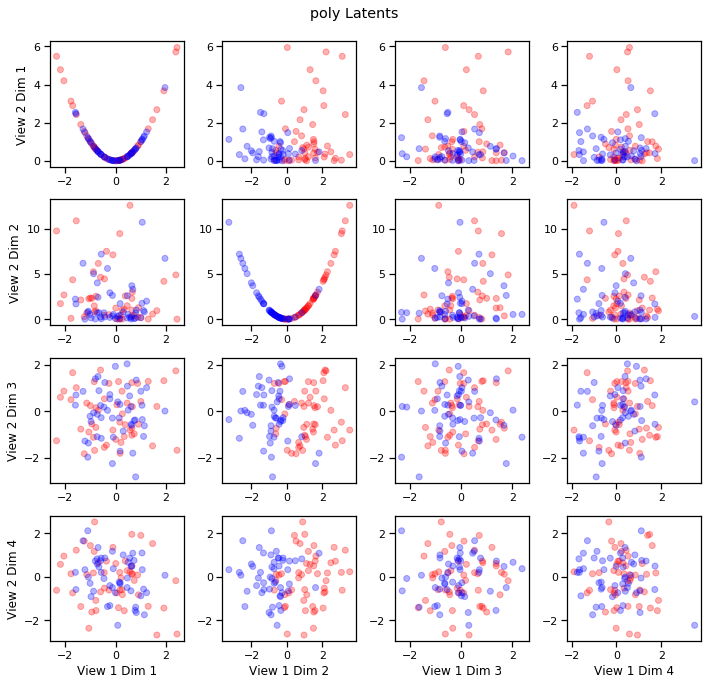

In [259]:
plot_2views(Xs_train, y_train, title=f'{transform} Latents', scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

In [324]:
ktype='poly'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 4, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

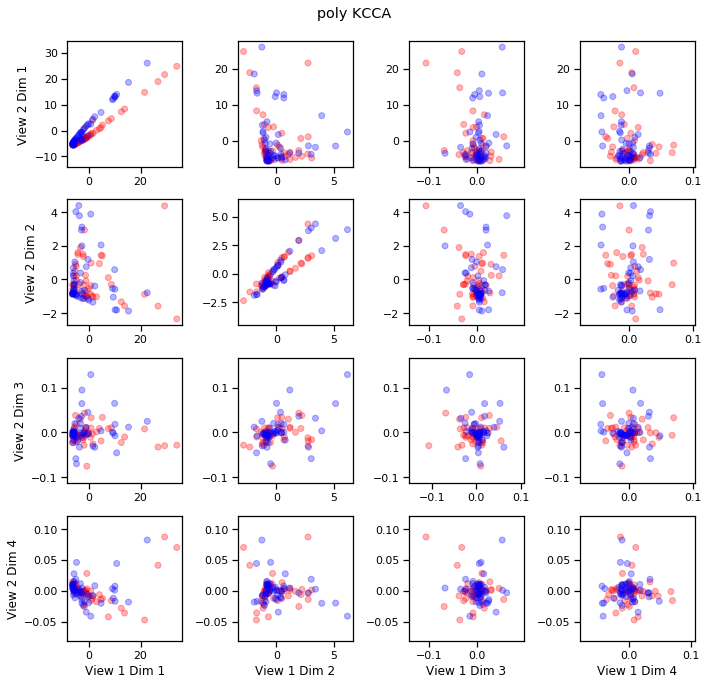

In [325]:
plot_2views(components, y_test, title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

## Gaussian

In [238]:
transform = 'sin'
n_noise = 2
GM_train.sample_views(transform=transform, n_noise=n_noise)
GM_test.sample_views(transform=transform, n_noise=n_noise)

Xs_train,y_train = GM_train.get_Xy()
Xs_test,y_test = GM_test.get_Xy()

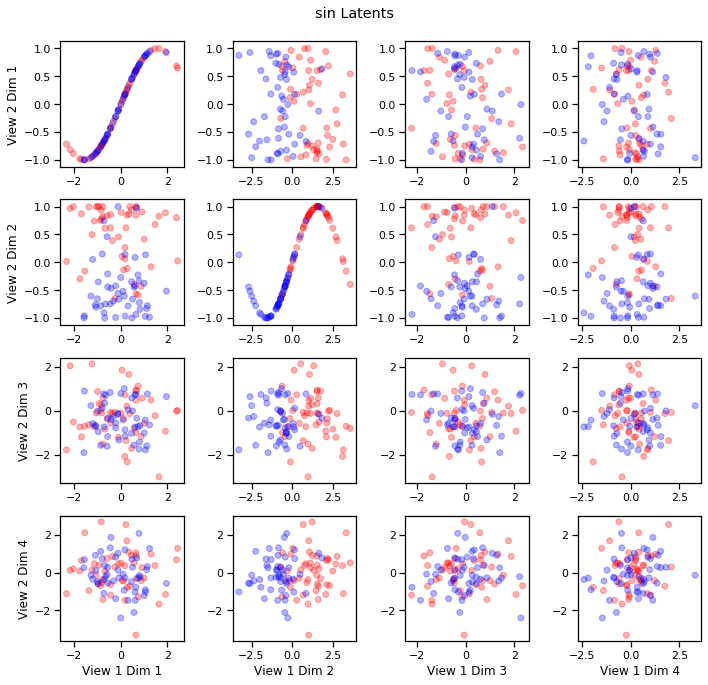

In [239]:
plot_2views(Xs_train, y_train, title=f'{transform} Latents', scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})

In [250]:
ktype='gaussian'
kcca = KCCA(ktype=ktype, reg = 1.0, sigma=2.0, n_components = 4, test=True)
components = kcca.fit(Xs_train).transform(Xs_test)

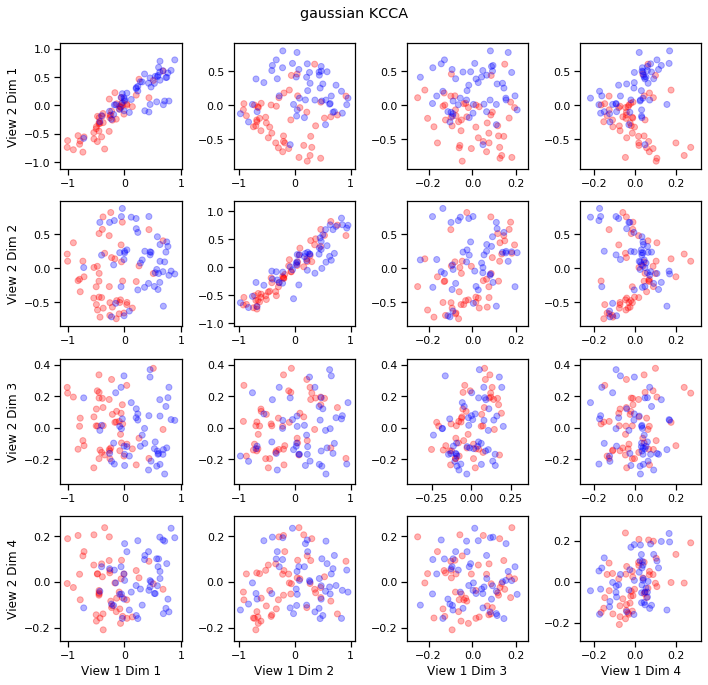

In [251]:
plot_2views(components, y_test, title=f'{ktype} KCCA', equal_axes=True, scatter_kwargs={'cmap':matplotlib.colors.ListedColormap(['red','blue']), 'alpha':0.3})